In [1]:
import eazy.hdf5
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
translate_file = 'cdfs.v1.6.11.translate'
param_file = 'cdfs.v1.6.1.zphot.param'

In [3]:
self = eazy.photoz.PhotoZ(param_file=param_file, translate_file=translate_file, zeropoint_file=None,
                         load_prior=False, load_products=False)
view = eazy.hdf5.Viewer('cdfs.v1.6.1.h5')

Read default param file: cdfs.v1.6.1.zphot.param
Read CATALOG_FILE: cdfs.v1.6.11.cat
   >>> NOBJ = 30911
f_IRAC_80 e_IRAC_80 ( 21): IRAC/irac_tr4_2004-08-09.dat
f_IRAC_58 e_IRAC_58 ( 20): IRAC/irac_tr3_2004-08-09.dat
f_IRAC_45 e_IRAC_45 ( 19): IRAC/irac_tr2_2004-08-09.dat
f_IRAC_36 e_IRAC_36 ( 18): IRAC/irac_tr1_2004-08-09.dat
f_Ks e_Ks (255): FOURSTAR/Ks_cam_optics_sky.txt
f_KsHI e_KsHI (269): VLT/hawki_k_ETC.dat
f_J1 e_J1 (249): FOURSTAR/J1_cam_optics_sky.txt
f_J2 e_J2 (250): FOURSTAR/J2_cam_optics_sky.txt
f_J3 e_J3 (251): FOURSTAR/J3_cam_optics_sky.txt
f_Hs e_Hs (254): FOURSTAR/Hshort_cam_optics_sky.txt
f_Hl e_Hl (253): FOURSTAR/Hlong_cam_optics_sky.txt
f_U e_U (103): ESO/vimos_u.res
f_B e_B (  1): hst/ACS_update_sep07/wfc_f435w_t77.dat
f_V e_V (  4): hst/ACS_update_sep07/wfc_f606w_t77.dat
f_R e_R (260): ESO/VIMOS/R.dat
f_I e_I (  5): hst/ACS_update_sep07/wfc_f775w_t77.dat
f_Z e_Z (  7): hst/ACS_update_sep07/wfc_f850lp_t77.dat
f_F125W e_F125W (203): hst/wfc3/IR/f125w.dat
f_F140W e_F

100%|██████████| 9/9 [04:16<00:00, 28.49s/it] 


Template   0: eazy_v1.1_sed1.dat (NZ=1).
Template   1: eazy_v1.1_sed2.dat (NZ=1).
Template   2: eazy_v1.1_sed3.dat (NZ=1).
Template   3: eazy_v1.1_sed4.dat (NZ=1).
Template   4: eazy_v1.1_sed5.dat (NZ=1).
Template   5: eazy_v1.1_sed6.dat (NZ=1).
Template   6: eazy_v1.1_sed7.dat (NZ=1).
Template   7: c09_del_8.6_z_0.019_chab_age09.40_av2.0.dat (NZ=1).
Template   8: erb2010_highEW.dat (NZ=1).
Process templates: 257.154 s


479it [00:31, 15.40it/s]


h5: read eazy_v1.1_sed1.dat
h5: read eazy_v1.1_sed2.dat
h5: read eazy_v1.1_sed3.dat
h5: read eazy_v1.1_sed4.dat
h5: read eazy_v1.1_sed5.dat
h5: read eazy_v1.1_sed6.dat
h5: read eazy_v1.1_sed7.dat
h5: read c09_del_8.6_z_0.019_chab_age09.40_av2.0.dat
h5: read erb2010_highEW.dat


In [4]:
object_ids = [6472, 1234, 5678]  # Update this list with your actual IDs

# Get the redshifts, from the second column of the txt file

# read in the csv file
selected_ids_df = pd.read_csv('selected_uvj_data_ids.csv', header=None)


# split into redshifts and ids, ignore the first row
selected_ids = selected_ids_df[0][1:]
selected_redshifts = selected_ids_df[1][1:]


In [5]:
object_ids = selected_ids
object_ids = [int(x) for x in object_ids]


In [6]:

# do the same with the redshifts
selected_redshifts = [float(x) for x in selected_redshifts]


In [7]:
len(object_ids)

3

In [8]:
show_fnu = 0  # Adjust this as needed: 0 for erg/s/cm^2/Å, 1 for µJy, 2 for µJy/micron # If you choose 0, the output flux may be in angstroms

c:\Users\Titan\Anaconda3\envs\eazy39\lib\site-packages\eazy\templates.py:680: RuntimeWarning: overflow encountered in multiply
  return (flam * self.wave**2 / (utils.CLIGHT*1.e10))


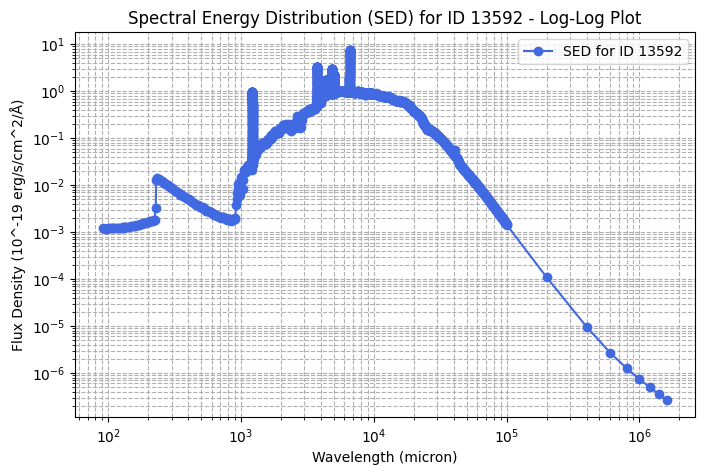

c:\Users\Titan\Anaconda3\envs\eazy39\lib\site-packages\eazy\templates.py:680: RuntimeWarning: overflow encountered in multiply
  return (flam * self.wave**2 / (utils.CLIGHT*1.e10))


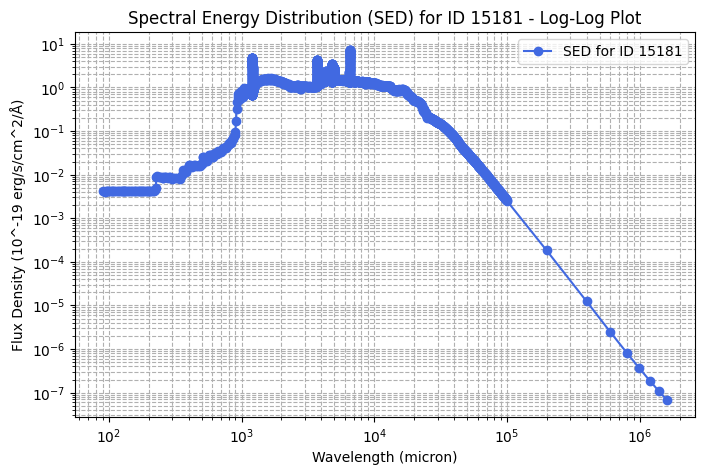

c:\Users\Titan\Anaconda3\envs\eazy39\lib\site-packages\eazy\templates.py:680: RuntimeWarning: overflow encountered in multiply
  return (flam * self.wave**2 / (utils.CLIGHT*1.e10))


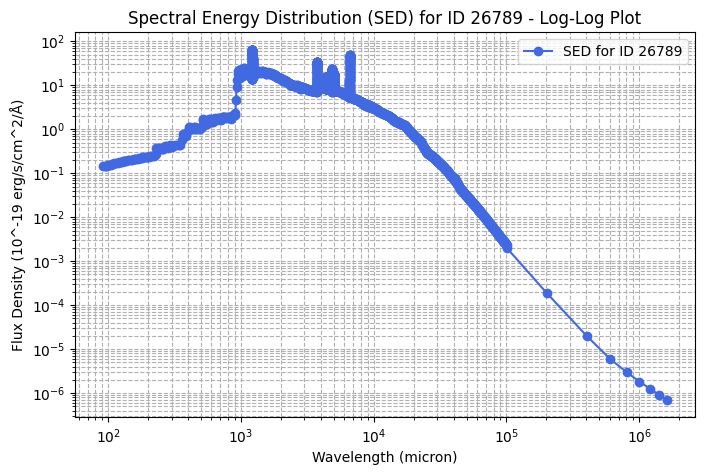

In [9]:
z_id = 0
for obj_id in object_ids:
    # Call the function with get_spec=True for the current object ID
    sed_data = view.show_fit(id=obj_id, get_spec=True, show_fnu=show_fnu)

    # Extract 'templz' (wavelength) and 'templf' (flux density) from the data
    
    # observered wavelength
    wavelengths = sed_data['templz']
    
    # Convert the wavelength into restframe wavelength
    wavelengths = wavelengths / (1 + float(selected_redshifts[z_id]))
    z_id += 1
    
    # flux density
    flux_densities = sed_data['templf']

    # Create a DataFrame
    df_sed = pd.DataFrame({
        'Wavelength': wavelengths,
        'FluxDensity': flux_densities
    })

    # Define the flux unit for the filename and plot label
    flux_unit = '10^-19 erg/s/cm^2/Å' if show_fnu == 0 else ('µJy' if show_fnu == 1 else 'µJy/micron')
    
    # Save to CSV
    csv_file_name = f'SED_{obj_id}_units_{flux_unit.replace("/", "_").replace(" ", "")}.csv'
    df_sed.to_csv("zfourgeSEDs/"+csv_file_name, index=False)

    # Plotting the SED in log-log space
    plt.figure(figsize=(8, 5))
    plt.loglog(df_sed['Wavelength'], df_sed['FluxDensity'], marker='o', linestyle='-', color='royalblue', label=f'SED for ID {obj_id}')
    plt.xlabel('Wavelength (micron)')
    plt.ylabel(f'Flux Density ({flux_unit})')
    plt.title(f'Spectral Energy Distribution (SED) for ID {obj_id} - Log-Log Plot')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()